In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohzary/.local/lib/python3.7/site-packages/tensorflow/py

In [2]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

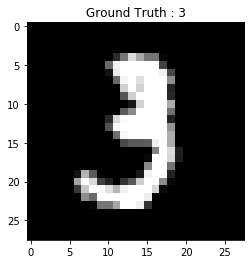

In [3]:
#display the first image in the training data
plt.imshow(train_images[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_labels[10]))
plt.show()

In [4]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

In [5]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

In [7]:
#scale data
train_data /=255.0
test_data /=255.0

In [8]:
#change the labels frominteger to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [9]:
#creating network, to change the number of hidden layer and the activation to tanh or sigmoid and see what happens
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(dimData,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=30, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 11s 181us/step - loss: 1.0498 - accuracy: 0.6263 - val_loss: 0.5127 - val_accuracy: 0.8298
Epoch 2/30
60000/60000 [==============================] - 10s 160us/step - loss: 0.4095 - accuracy: 0.8708 - val_loss: 0.3105 - val_accuracy: 0.9022
Epoch 3/30
60000/60000 [==============================] - 10s 159us/step - loss: 0.2798 - accuracy: 0.9134 - val_loss: 0.2471 - val_accuracy: 0.9241
Epoch 4/30
60000/60000 [==============================] - 10s 168us/step - loss: 0.2095 - accuracy: 0.9354 - val_loss: 0.1856 - val_accuracy: 0.9428
Epoch 5/30
60000/60000 [==============================] - 10s 161us/step - loss: 0.1668 - accuracy: 0.9486 - val_loss: 0.2244 - val_accuracy: 0.9267
Epoch 6/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.1358 - accuracy: 0.9584 - val_loss: 0.1580 - val_accuracy: 0.9510
Epoch 7/30
60000/60000 [==============================]

In [10]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 115us/step
Evaluation result on Test Data : Loss = 0.1671866798070132, accuracy = 0.9714000225067139


In [11]:
print(history.history)

{'val_loss': [0.5127385931968689, 0.3105050313949585, 0.2471179266810417, 0.18558422360420226, 0.2243884857416153, 0.15804253368377685, 0.17260270614624024, 0.1186895434036851, 0.10041113547235728, 0.08670458762645722, 0.08909639702886343, 0.1291407153479755, 0.11416093947887421, 0.0991895449101925, 0.1039711551092565, 0.11333445509411394, 0.09896191369430161, 0.1046478881213814, 0.11436317159682512, 0.08684985350902426, 0.25084123633801936, 0.1110774862627266, 0.10764025356132478, 0.11492171007614815, 0.10870803809220451, 0.10978377815855747, 0.11584816521142748, 0.12119524306040166, 0.12587154937977757, 0.1671866691022122], 'val_accuracy': [0.829800009727478, 0.9021999835968018, 0.9240999817848206, 0.942799985408783, 0.9266999959945679, 0.9509999752044678, 0.946399986743927, 0.9627000093460083, 0.9693999886512756, 0.9742000102996826, 0.9735000133514404, 0.961899995803833, 0.9681000113487244, 0.97079998254776, 0.9732000231742859, 0.9707000255584717, 0.9749000072479248, 0.9735000133514

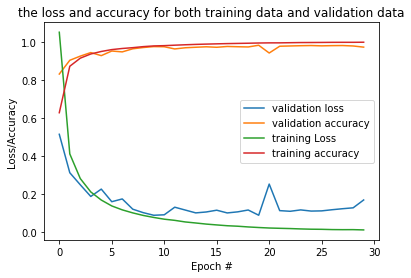

In [14]:
#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 30), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 30), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, 30), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 30), history.history["accuracy"], label="training accuracy")
plt.title("the loss and accuracy for both training data and validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

[9]


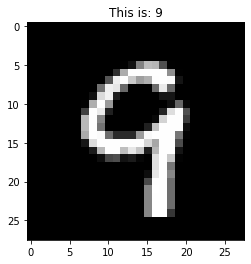

In [15]:
# To plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image in the test data


predict_classe = model.predict_classes(test_data[[150],:])
print(predict_classe)
plt.imshow(test_images[150].reshape((28, 28)), cmap = 'gray')
plt.title("This is: " + str(predict_classe[0]))
plt.show()
